C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[

Data saved to META_data.csv
Data saved to AAPL_data.csv
Data saved to MSFT_data.csv



C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)

C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\1024256901.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed



Data saved to TSLA_data.csv
Data saved to NVDA_data.csv
Data saved to INTC_data.csv


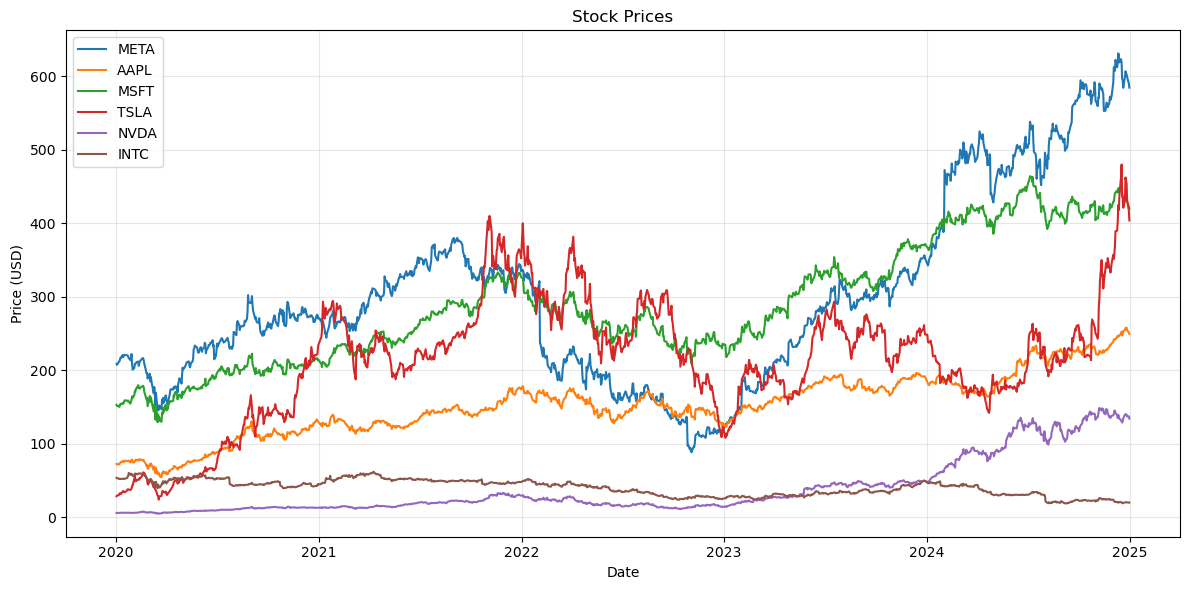

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_and_save_stock_data(tickers, start="2020-01-01", end="2025-01-01"):
    """
    Download historical stock data for multiple tickers and save to CSV files.

    Parameters:
    tickers : list of str
        List of stock tickers to download.
    start : str
        Start date for historical data.
    end : str
        End date for historical data.

    Returns:
    dict
        Dictionary of DataFrames with tickers as keys.
    """
    data = {}
    for ticker in tickers:
        stock = yf.download(ticker, start=start, end=end)
        stock.to_csv(f"{ticker}_data.csv")
        print(f"Data saved to {ticker}_data.csv")
        data[ticker] = stock
    return data

def plot_stock_prices(data, tickers):
    """
    Plot closing prices for multiple stocks.

    Parameters:
    data : dict
        Dictionary of DataFrames with tickers as keys.
    tickers : list of str
        List of stock tickers to plot.
    """
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(data[ticker]["Close"], label=ticker)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title("Stock Prices")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    tickers = ["META", "AAPL", "MSFT", "TSLA", "NVDA", "INTC"]
    stock_data = download_and_save_stock_data(tickers)
    plot_stock_prices(stock_data, tickers)

In [18]:
import numpy as np

# Calculate pairwise correlations between stock prices
def calculate_pairwise_correlations(prices, tickers):
    """
    Calculate and print pairwise correlations between multiple stock prices.

    Parameters:
    prices : list of numpy.ndarray
        List of price arrays for different stocks.
    tickers : list of str
        List of stock tickers corresponding to the price arrays.
    """
    n = len(prices)
    for i in range(n):
        for j in range(i + 1, n):
            correlation = np.corrcoef(prices[i].T, prices[j].T)[0, 1]
            print(f"Correlation between {tickers[i]} and {tickers[j]}: {correlation:.4f}")

# Prepare price arrays and tickers
prices = [
    np.array(df1["Close"]),
    np.array(df2["Close"]),
    np.array(df3["Close"]),
    np.array(df4["Close"]),
    np.array(df5["Close"])
]

tickers = [ticker1, ticker2, ticker3, ticker4, ticker5]

# Calculate and print correlations
calculate_pairwise_correlations(prices, tickers)

Correlation between META and AAPL: 0.6819
Correlation between META and MSFT: 0.8170
Correlation between META and TSLA: 0.2946
Correlation between META and NVDA: 0.8795
Correlation between AAPL and MSFT: 0.9302
Correlation between AAPL and TSLA: 0.6645
Correlation between AAPL and NVDA: 0.8244
Correlation between MSFT and TSLA: 0.5114
Correlation between MSFT and NVDA: 0.8920
Correlation between TSLA and NVDA: 0.2955


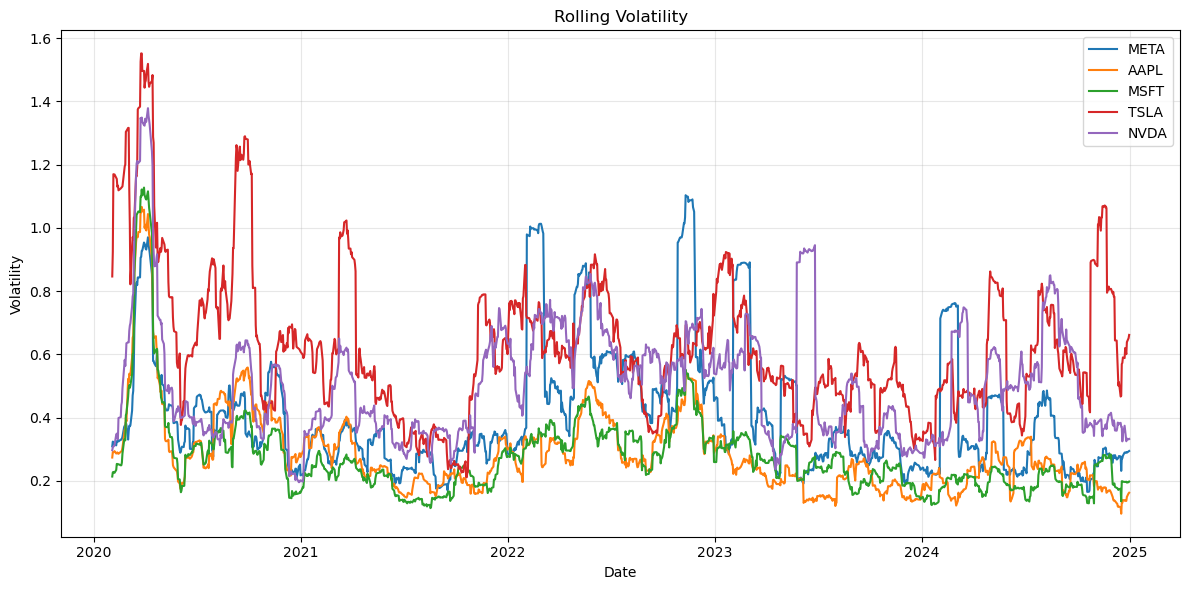

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling volatility
def calculate_volatility(price_series, window=21, annualize=True):
    """
    Calculate rolling volatility of a price series.

    Parameters:
    price_series : pandas.Series or numpy.array
        Time series of prices.
    window : int
        Rolling window in days.
    annualize : bool
        Whether to annualize the volatility.

    Returns:
    pandas.Series
        Rolling volatility.
    """
    price_series = pd.Series(price_series) if isinstance(price_series, np.ndarray) else price_series
    returns = price_series.pct_change().dropna()
    rolling_vol = returns.rolling(window=window).std()
    if annualize:
        rolling_vol *= np.sqrt(252)
    return rolling_vol

# Prepare data for volatility calculation
def plot_volatilities(dataframes, tickers, window=21):
    """
    Plot rolling volatilities for multiple stocks.

    Parameters:
    dataframes : list of pandas.DataFrame
        List of dataframes containing stock prices.
    tickers : list of str
        List of stock tickers corresponding to the dataframes.
    window : int
        Rolling window in days.
    """
    plt.figure(figsize=(12, 6))
    for df, ticker in zip(dataframes, tickers):
        volatility = calculate_volatility(df["Close"], window=window)
        plt.plot(volatility, label=ticker)
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.title("Rolling Volatility")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Data and tickers
dataframes = [df1, df2, df3, df4, df5]
tickers = [ticker1, ticker2, ticker3, ticker4, ticker5]

# Plot volatilities
plot_volatilities(dataframes, tickers)

Monthly percentage changes for NVDA:
            Monthly_Percentage_Change
Date                                 
2020-01-02                  20.791117
2020-01-03                  25.627978
2020-01-06                  32.751224
2020-01-07                  28.662499
2020-01-08                  22.335459


C:\Users\abcgi\AppData\Local\Temp\ipykernel_26444\3610230664.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pct_diff[i] = (prices[i + days] - prices[i]) / prices[i] * 100


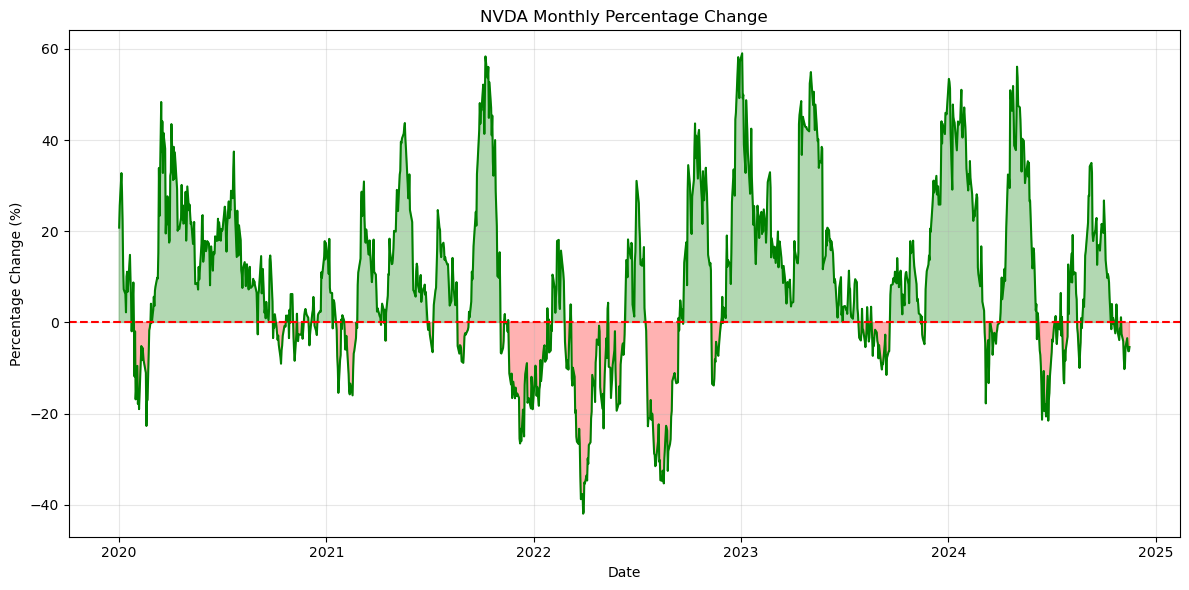


Statistics of monthly percentage changes for NVDA:
Mean: 9.52%
Median: 8.26%
Min: -41.97%
Max: 59.02%
Standard Deviation: 18.84%
Percentage of positive yearly changes: 67.26%


In [21]:
# Calculate year-over-year percentage difference for a 1D array 'prices5'

# First, let's extract the 1D array from df5
prices5 = np.array(df5["Close"])
time=30
# Calculate year-over-year percentage difference
# This will compute (prices5[n+365] - prices5[n]) / prices5[n] * 100 for each n
# The result will be shorter than the original array by 365 elements

def calculate_temporal_percentage_diff(prices, days=time):
    """
    Calculate the percentage difference between each element and the element
    'days' positions ahead (e.g., 365 days for yearly comparison).
    
    Parameters:
    -----------
    prices : numpy.ndarray
        1D array of price values
    days : int
        Number of days to look ahead (default: 365)
    
    Returns:
    --------
    numpy.ndarray
        Array of percentage differences, length will be len(prices) - days
    """
    if len(prices) <= days:
        raise ValueError(f"Array must have more than {days} elements")
    
    # Calculate the percentage difference
    pct_diff = np.zeros(len(prices) - days)
    for i in range(len(pct_diff)):
        pct_diff[i] = (prices[i + days] - prices[i]) / prices[i] * 100
    
    return pct_diff

# Calculate the yearly percentage difference
monthly_pct_diff = calculate_temporal_percentage_diff(prices5)

# Create a DataFrame to better visualize with dates
# We'll use the dates from our original DataFrame
dates = df5.index[:-time]  # Exclude the last 365 days
yearly_pct_diff_df = pd.DataFrame({
    'Date': dates,
    'Monthly_Percentage_Change': monthly_pct_diff
}).set_index('Date')

# Display the first few rows of the result
print(f"Monthly percentage changes for {ticker5}:")
print(yearly_pct_diff_df.head())

# Visualize the monthly percentage changes
plt.figure(figsize=(12, 6))
plt.plot(yearly_pct_diff_df.index, yearly_pct_diff_df['Monthly_Percentage_Change'], 'g-')
plt.axhline(y=0, color='r', linestyle='--')
plt.fill_between(yearly_pct_diff_df.index, 
                 yearly_pct_diff_df['Monthly_Percentage_Change'], 
                 0, 
                 where=(yearly_pct_diff_df['Monthly_Percentage_Change'] >= 0), 
                 color='green', alpha=0.3)
plt.fill_between(yearly_pct_diff_df.index, 
                 yearly_pct_diff_df['Monthly_Percentage_Change'], 
                 0, 
                 where=(yearly_pct_diff_df['Monthly_Percentage_Change'] < 0), 
                 color='red', alpha=0.3)
plt.title(f"{ticker5} Monthly Percentage Change")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics about the monthly percentage changes
print(f"\nStatistics of monthly percentage changes for {ticker5}:")
print(f"Mean: {monthly_pct_diff.mean():.2f}%")
print(f"Median: {np.median(monthly_pct_diff):.2f}%")
print(f"Min: {monthly_pct_diff.min():.2f}%")
print(f"Max: {monthly_pct_diff.max():.2f}%")
print(f"Standard Deviation: {monthly_pct_diff.std():.2f}%")
print(f"Percentage of positive yearly changes: {(monthly_pct_diff > 0).mean()*100:.2f}%")

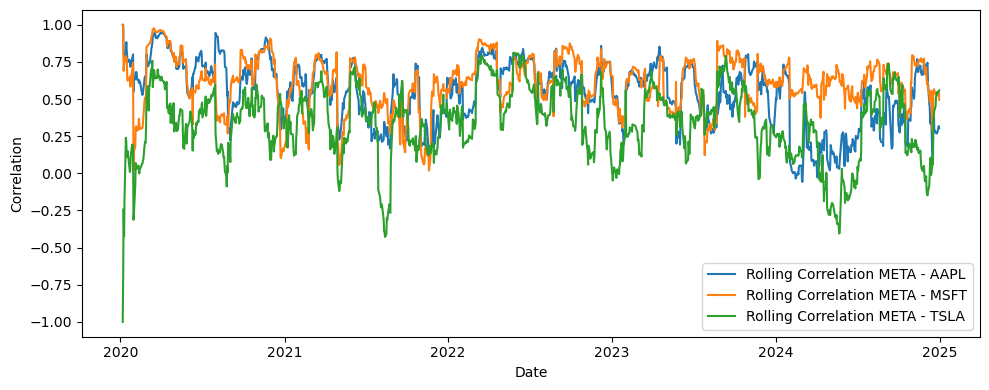

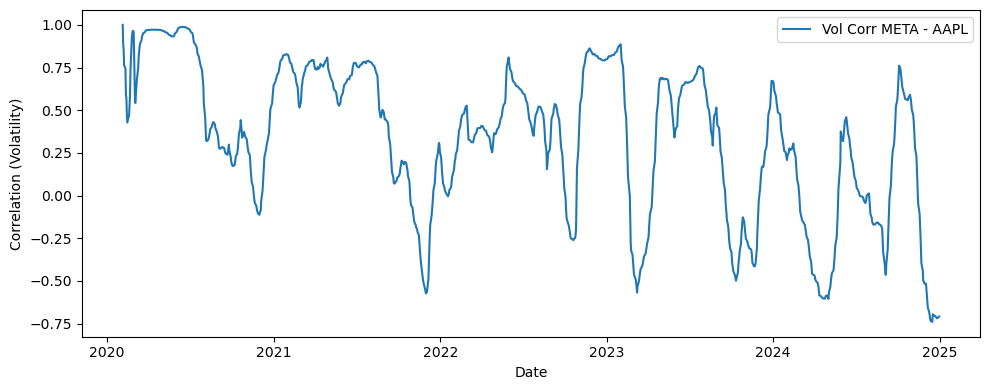

In [7]:
# Rolling correlation of returns (robust against scalar/index issues)

def rolling_corr(df1, df2, days=20, min_periods=2):
    # Compute returns
    returns1 = df1["Close"].pct_change()
    returns2 = df2["Close"].pct_change()

    # Ensure 1D Series (not DataFrame) just in case prior variables shadowed names
    if isinstance(returns1, pd.DataFrame):
        returns1 = returns1.squeeze(axis=1)
    if isinstance(returns2, pd.DataFrame):
        returns2 = returns2.squeeze(axis=1)

    # Align by date and drop NaNs
    combined = pd.concat([
        returns1.rename("META"),
        returns2.rename("AAPL")
    ], axis=1).dropna()

    # Then calculate the rolling correlation with appropriate min_periods
    rolling_corr = combined["META"].rolling(window=days, min_periods=min_periods).corr(combined["AAPL"])
    return rolling_corr

rolling_corr12 = rolling_corr(df1, df2, days=20, min_periods=2)
rolling_corr13 = rolling_corr(df1, df3, days=20, min_periods=2)
rolling_corr14 = rolling_corr(df1, df4, days=20, min_periods=2)

plt.figure(figsize=(10, 4))
plt.plot(rolling_corr12, label=f"Rolling Correlation {ticker1} - {ticker2}")
plt.plot(rolling_corr13, label=f"Rolling Correlation {ticker1} - {ticker3}")
plt.plot(rolling_corr14, label=f"Rolling Correlation {ticker1} - {ticker4}")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.tight_layout()
plt.show()

# New: rolling correlation between volatilities

def rolling_corr_vol(vol1, vol2, days=20, min_periods=2):
    """
    Compute rolling correlation between two volatility series.

    Parameters:
    - vol1, vol2: pandas Series or DataFrames (single column) representing volatilities
    - days: rolling window length
    - min_periods: minimum periods for rolling correlation

    Returns:
    - pandas Series of rolling correlation values aligned by date
    """
    # Ensure Series
    if isinstance(vol1, pd.DataFrame):
        vol1 = vol1.squeeze(axis=1)
    if isinstance(vol2, pd.DataFrame):
        vol2 = vol2.squeeze(axis=1)

    # Align by index and drop NaNs
    combined = pd.concat([
        vol1.rename("v1"),
        vol2.rename("v2")
    ], axis=1).dropna()

    return combined["v1"].rolling(window=days, min_periods=min_periods).corr(combined["v2"])

# Examples using previously computed volatilities
vol_corr12 = rolling_corr_vol(volatility1, volatility2, days=60, min_periods=2)
vol_corr13 = rolling_corr_vol(volatility1, volatility3, days=60, min_periods=2)
vol_corr14 = rolling_corr_vol(volatility1, volatility4, days=60, min_periods=2)

plt.figure(figsize=(10, 4))
plt.plot(vol_corr12, label=f"Vol Corr {ticker1} - {ticker2}")
#plt.plot(vol_corr13, label=f"Vol Corr {ticker1} - {ticker3}")
#plt.plot(vol_corr14, label=f"Vol Corr {ticker1} - {ticker4}")
plt.xlabel("Date")
plt.ylabel("Correlation (Volatility)")
plt.legend()
plt.tight_layout()
plt.show()

## Correlation Heatmaps (Color Maps) for Price Levels and Returns

The heatmaps below show pairwise correlations across the selected tickers. Left: correlations of price levels; Right: correlations of daily returns.

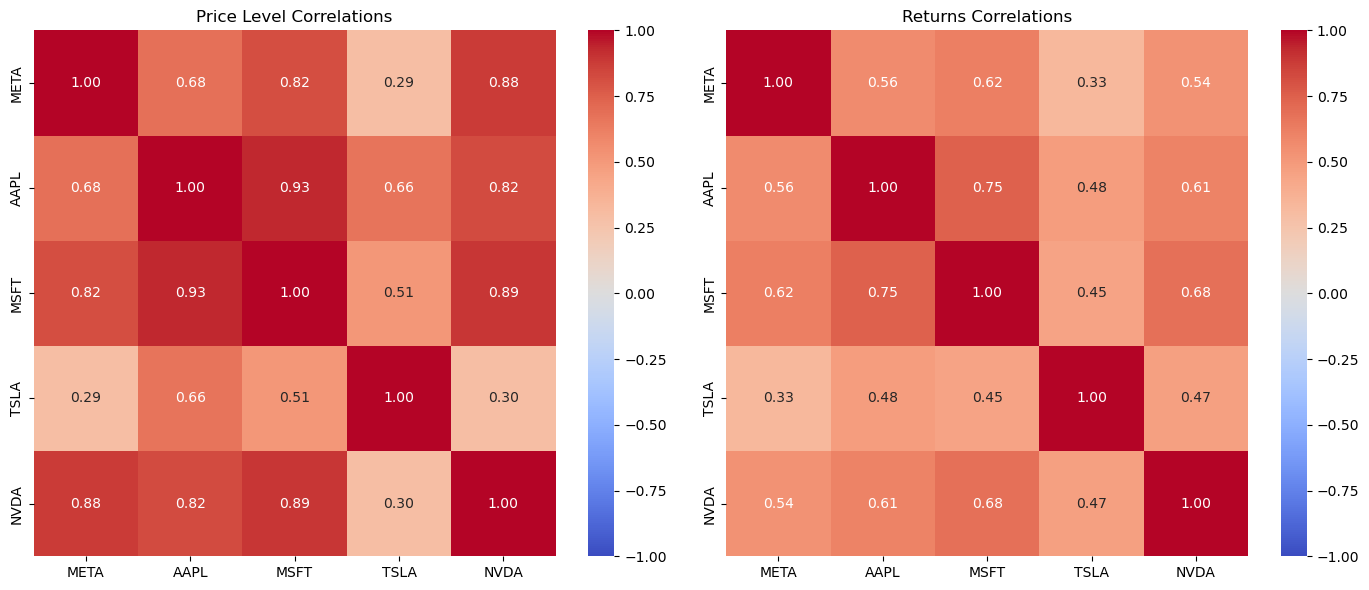

In [8]:
# Build aligned price DataFrame and plot correlation heatmaps
import seaborn as sns

# Combine prices and align by date without using Series.rename
prices = pd.concat([
    df1["Close"],
    df2["Close"],
    df3["Close"],
    df4["Close"],
    df5["Close"],
], axis=1)
prices.columns = [ticker1, ticker2, ticker3, ticker4, ticker5]
prices = prices.dropna()

# Correlation matrices
price_corr = prices.corr()
returns = prices.pct_change().dropna()
returns_corr = returns.corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(price_corr, ax=axes[0], annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt=".2f")
axes[0].set_title("Price Level Correlations")

sns.heatmap(returns_corr, ax=axes[1], annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt=".2f")
axes[1].set_title("Returns Correlations")

plt.tight_layout()
plt.show()

## Animated Rolling Correlation Heatmap (GIF)

Creates a GIF that shows how the pairwise correlation between tickers (based on daily returns) evolves over time using a rolling window.

In [9]:
# Animate rolling correlation heatmaps and save as GIF
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Build aligned price DataFrame
prices = pd.concat([
    df1["Close"],
    df2["Close"],
    df3["Close"],
    df4["Close"],
    df5["Close"],
], axis=1)
prices.columns = [ticker1, ticker2, ticker3, ticker4, ticker5]
prices = prices.dropna()

# Compute daily returns
returns = prices.pct_change().dropna()

# Animation parameters
window = 30   # rolling window size in days
step = 10     # frame step (use larger step to reduce frames and speed up)
fps = 6       # frames per second for the GIF

# Guard for small datasets
if len(returns) < window:
    raise ValueError(f"Not enough data to compute a rolling window of size {window} (len={len(returns)}).")

# Prepare frame indices (end of each rolling window)
frame_indices = list(range(window, len(returns) + 1, step))
frame_indices = frame_indices[:100]

# Helper to compute correlation matrix for a frame
def corr_at(index_pos: int):
    window_slice = returns.iloc[index_pos - window:index_pos]
    return window_slice.corr(), returns.index[index_pos - 1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(6, 5))
init_corr, init_dt = corr_at(frame_indices[0])
# Draw initial heatmap without creating a colorbar each time
sns.heatmap(init_corr, ax=ax, vmin=0, vmax=1, cmap="coolwarm", annot=False, cbar=False)
ax.set_title(f"Rolling {window}-Day Returns Correlation — {init_dt.date()}")

# Add a single shared colorbar for the entire animation
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap="coolwarm")
sm.set_array([])
fig.colorbar(sm, ax=ax)
plt.tight_layout()

# Update function for animation (no new colorbar per frame)
def update(frame_idx):
    ax.clear()
    corr_m, dt = corr_at(frame_indices[frame_idx])
    sns.heatmap(corr_m, ax=ax, vmin=0, vmax=1, cmap="coolwarm", annot=False, cbar=False)
    ax.set_title(f"Rolling {window}-Day Returns Correlation — {dt.date()}")
    return ax

ani = animation.FuncAnimation(fig, update, frames=len(frame_indices), interval=int(1000 / fps), blit=False)

# Save to GIF using PillowWriter
outfile = "rolling_returns_corr_heatmap.gif"
ani.save(outfile, writer=PillowWriter(fps=fps))
plt.close(fig)
print(f"Saved GIF to {outfile}")

Saved GIF to rolling_returns_corr_heatmap.gif


In [10]:
# Engle–Granger cointegration test between df1 and df2 (log Close prices)
from statsmodels.tsa.stattools import coint
import numpy as np
import pandas as pd

# Align by date; set column names explicitly to avoid rename issues
_pair = pd.concat([
    df1["Close"],
    df2["Close"],
], axis=1).dropna()
_pair.columns = [ticker1, ticker2]

# Log-transform prices (common for cointegration on equity prices)
log_pair = np.log(_pair)

# Run Engle–Granger test (default trend='c', maxlag=None, autolag='aic')
stat, pvalue, crit = coint(log_pair.iloc[:, 0], log_pair.iloc[:, 1])

print(f"Engle–Granger cointegration test: {ticker1} vs {ticker2}")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {pvalue:.4g}")
print("Critical values:")
# statsmodels 0.14.x returns ndarray in order [1%, 5%, 10%]
if isinstance(crit, (list, np.ndarray)):
    labels = ["1%", "5%", "10%"]
    for lbl, val in zip(labels, np.asarray(crit)):
        print(f"  {lbl}: {val:.4f}")
elif isinstance(crit, dict):
    for k, v in crit.items():
        print(f"  {k}: {v:.4f}")
else:
    print(crit)

# Simple interpretation at 5% level
alpha = 0.05
print("\nInterpretation (alpha=5%):")
if pvalue < alpha:
    print("Reject H0 of no cointegration → series appear cointegrated.")
else:
    print("Fail to reject H0 → no evidence of cointegration at 5%.")

Engle–Granger cointegration test: META vs AAPL
Test statistic: -1.0794
p-value: 0.8867
Critical values:
  1%: -3.9052
  5%: -3.3410
  10%: -3.0478

Interpretation (alpha=5%):
Fail to reject H0 → no evidence of cointegration at 5%.


## Bollinger Bands with Intersections for All Five Stocks

Plots 20-day Bollinger Bands (SMA ± 2σ) for each ticker and highlights where price intersects the upper or lower band.

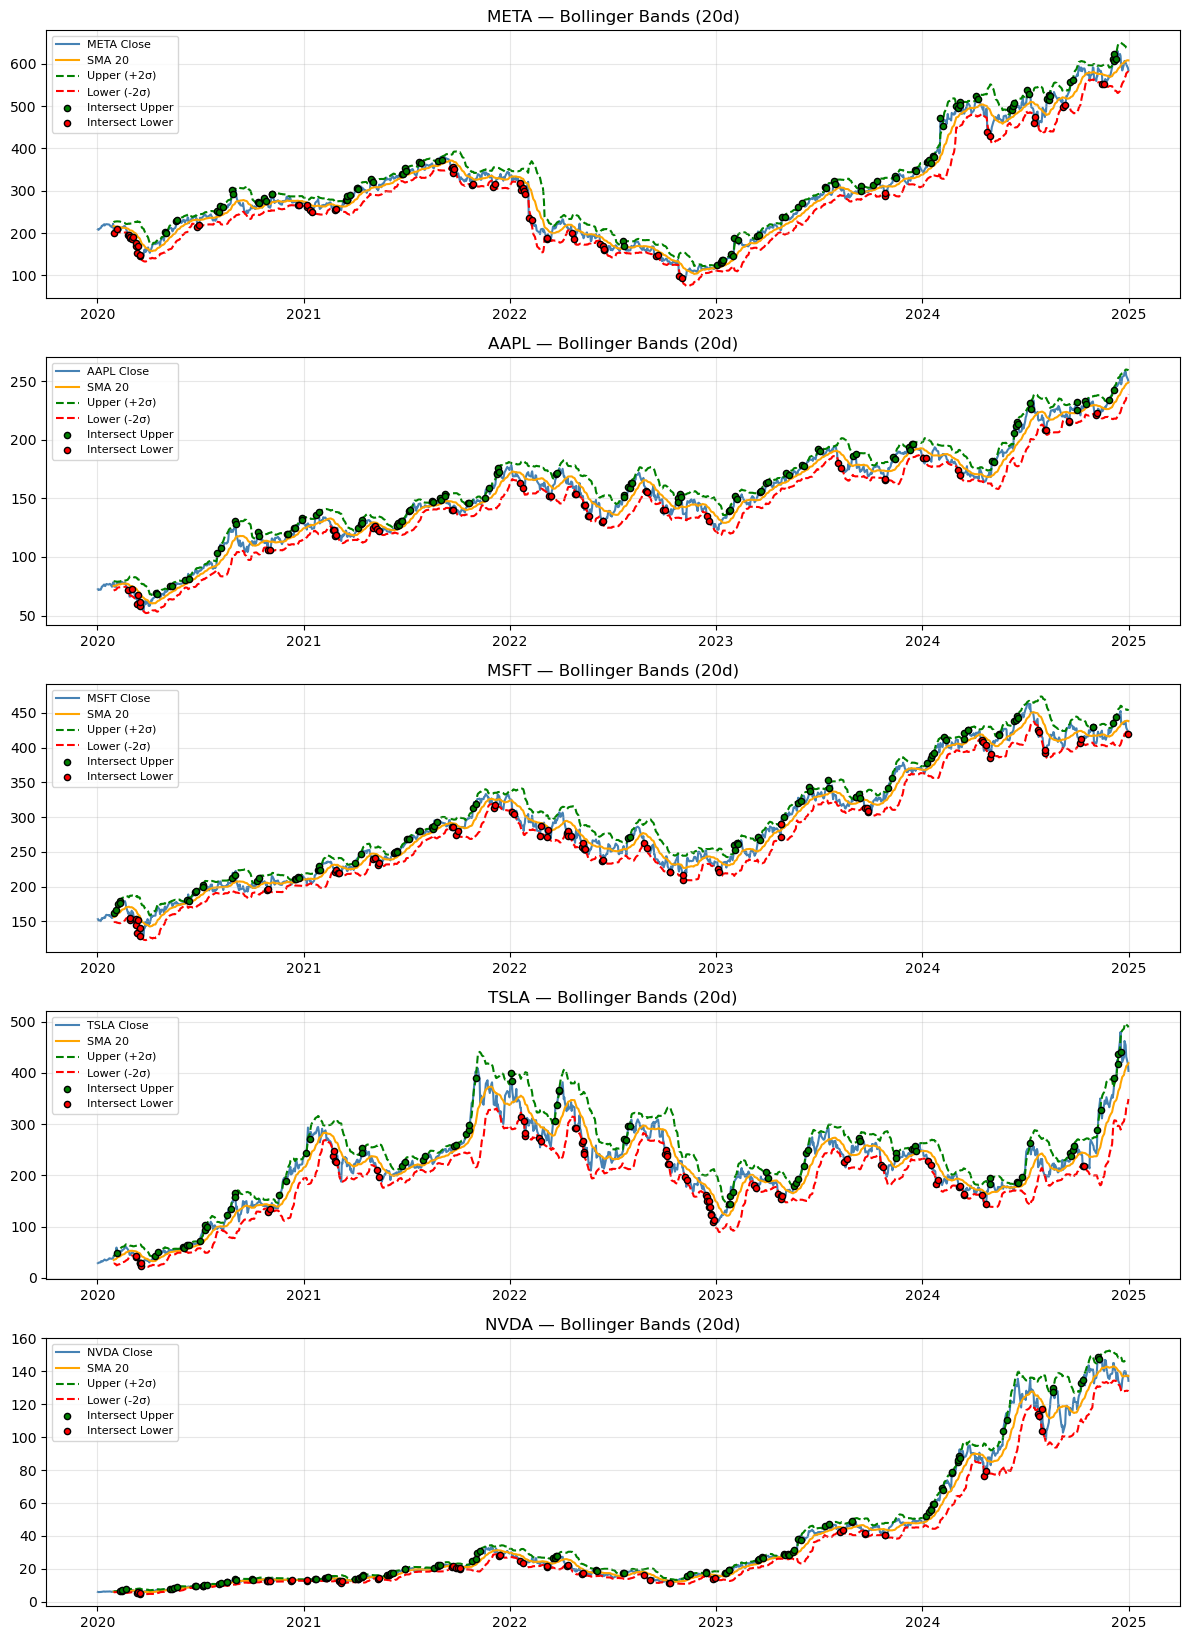

In [11]:
# Plot Bollinger Bands with intersections for all five stocks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Helper: compute SMA, bands, and intersection masks
def bollinger_with_crosses(close: pd.Series, window: int = 20):
    if isinstance(close, pd.DataFrame):
        close = close.squeeze('columns')
    s = close.dropna()
    sma = s.rolling(window).mean()
    std = s.rolling(window).std()
    upper = sma + 2 * std
    lower = sma - 2 * std

    ps = s.to_numpy(dtype=float).ravel()
    up = upper.reindex(s.index).to_numpy(dtype=float).ravel()
    lo = lower.reindex(s.index).to_numpy(dtype=float).ravel()

    prev_ps = np.roll(ps, 1); prev_ps[0] = np.nan
    prev_up = np.roll(up, 1); prev_up[0] = np.nan
    prev_lo = np.roll(lo, 1); prev_lo[0] = np.nan

    with np.errstate(invalid='ignore'):
        upper_cross_mask = np.isfinite(up) & np.isfinite(prev_up) & ((prev_ps - prev_up) * (ps - up) <= 0)
        lower_cross_mask = np.isfinite(lo) & np.isfinite(prev_lo) & ((prev_ps - prev_lo) * (ps - lo) <= 0)

    idx_upper = s.index[upper_cross_mask]
    idx_lower = s.index[lower_cross_mask]
    return s, sma, upper, lower, idx_upper, idx_lower

# Collect series and labels
series_list = [df1['Close'], df2['Close'], df3['Close'], df4['Close'], df5['Close']]
labels = [ticker1, ticker2, ticker3, ticker4, ticker5]

rows = len(series_list)
fig, axes = plt.subplots(rows, 1, figsize=(12, 3.3*rows), sharex=False)
if rows == 1:
    axes = [axes]

for ax, srs, lbl in zip(axes, series_list, labels):
    s, sma, upper, lower, idx_up, idx_lo = bollinger_with_crosses(srs, window=20)
    ax.plot(s.index, s, label=f"{lbl} Close", color='steelblue', zorder=1)
    ax.plot(sma.index, sma, label='SMA 20', color='orange', zorder=1)
    ax.plot(upper.index, upper, label='Upper (+2σ)', color='green', linestyle='--', zorder=1)
    ax.plot(lower.index, lower, label='Lower (-2σ)', color='red', linestyle='--', zorder=1)
    if len(idx_up) > 0:
        ax.scatter(idx_up, s.loc[idx_up], color='green', edgecolor='black', s=20, zorder=3, label='Intersect Upper')
    if len(idx_lo) > 0:
        ax.scatter(idx_lo, s.loc[idx_lo], color='red', edgecolor='black', s=20, zorder=3, label='Intersect Lower')
    ax.set_title(f"{lbl} — Bollinger Bands (20d)")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=8)

fig.tight_layout()
plt.show()